In [ ]:
# Get iris data from archive
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-04-12 08:44:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-04-12 08:44:11 (98.3 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
# Utils to calcualte mass function
!git clone https://github.com/reineking/pyds

Cloning into 'pyds'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 307 (delta 0), reused 1 (delta 0), pack-reused 304
Receiving objects: 100% (307/307), 102.23 KiB | 10.22 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [ ]:
from pyds.pyds import MassFunction, powerset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv

In [ ]:
data_file = r'./iris.data'
df = pd.read_csv(data_file, index_col=False,names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])
print('data shape:', df.shape)
df.sample(10), len(df)

data shape: (150, 5)


(     SepalLength  SepalWidth  PetalLength  PetalWidth            Class
 9            4.9         3.1          1.5         0.1      Iris-setosa
 21           5.1         3.7          1.5         0.4      Iris-setosa
 95           5.7         3.0          4.2         1.2  Iris-versicolor
 64           5.6         2.9          3.6         1.3  Iris-versicolor
 98           5.1         2.5          3.0         1.1  Iris-versicolor
 53           5.5         2.3          4.0         1.3  Iris-versicolor
 18           5.7         3.8          1.7         0.3      Iris-setosa
 122          7.7         2.8          6.7         2.0   Iris-virginica
 91           6.1         3.0          4.6         1.4  Iris-versicolor
 66           5.6         3.0          4.5         1.5  Iris-versicolor, 150)

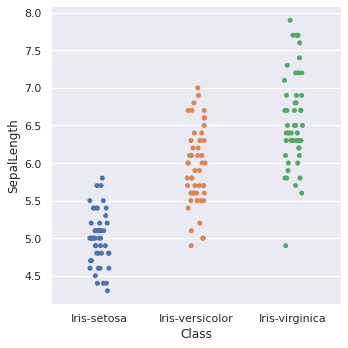

In [ ]:
sns.catplot(data=df, y = "SepalLength", x = "Class")

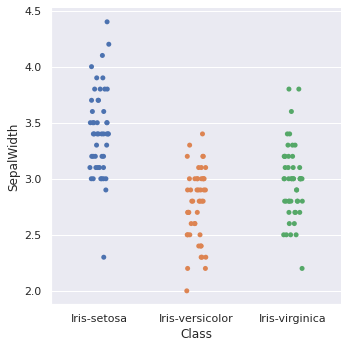

In [ ]:
sns.catplot(data=df, y = "SepalWidth", x = "Class")

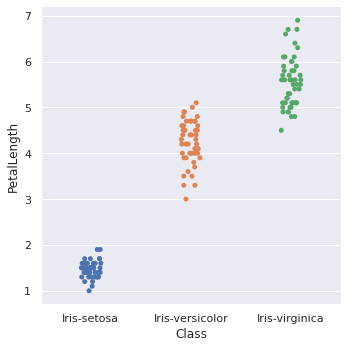

In [ ]:
sns.catplot(data=df, y = "PetalLength", x = "Class")

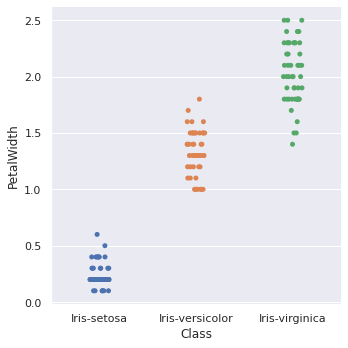

In [ ]:
sns.catplot(data=df, y = "PetalWidth", x = "Class")

#Define the frame of discernment


In [ ]:
# All possible combination of classes
from pprint import pprint
pset = dict.fromkeys(powerset(df.Class.unique()), 0)
pprint(pset)

{frozenset(): 0,
 frozenset({'Iris-setosa'}): 0,
 frozenset({'Iris-versicolor'}): 0,
 frozenset({'Iris-virginica'}): 0,
 frozenset({'Iris-setosa', 'Iris-versicolor'}): 0,
 frozenset({'Iris-setosa', 'Iris-virginica'}): 0,
 frozenset({'Iris-versicolor', 'Iris-virginica'}): 0,
 frozenset({'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}): 0}


In [ ]:
fields = df.columns.values[:-1]
fields

array(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
      dtype=object)

#  Determine class membership

In [ ]:
# Min and Max range for each class, 
classRange = {}
for c in df.Class.unique():
    fieldRange = {}
    for f in fields:
        fieldRange[f] =(df[df.Class == c][f].min(), df[df.Class == c][f].max())
    classRange[c] = fieldRange
pprint(classRange)

{'Iris-setosa': {'PetalLength': (1.0, 1.9),
                 'PetalWidth': (0.1, 0.6),
                 'SepalLength': (4.3, 5.8),
                 'SepalWidth': (2.3, 4.4)},
 'Iris-versicolor': {'PetalLength': (3.0, 5.1),
                     'PetalWidth': (1.0, 1.8),
                     'SepalLength': (4.9, 7.0),
                     'SepalWidth': (2.0, 3.4)},
 'Iris-virginica': {'PetalLength': (4.5, 6.9),
                    'PetalWidth': (1.4, 2.5),
                    'SepalLength': (4.9, 7.9),
                    'SepalWidth': (2.2, 3.8)}}


#  Assign mass functions

In [ ]:
# Assign Mass function for 

def hypothesis(df, classRange, fieldName, value):
    """
    Possible hypothesis for a value
    """
    hset = set()
    for c in df.Class.unique():
        if (classRange[c][fieldName][0] <= value and value < classRange[c][fieldName][1]):
            hset.add(c)
    return frozenset(hset)

def hypothesisCounts(hypothesisCount, h, singletons, frame):
    """
    Count singlestons, 
    """
    if h in singletons:
        hypothesisCount[h] += 0.9
        hypothesisCount[frame] += 0.1
    elif h == frame:
        hypothesisCount[frame] += 1.0
    else:
        hypothesisCount[h] += 0.9
        hypothesisCount[frame] += 0.1

hypothesisCount = dict.fromkeys(powerset(df.Class.unique()), 0)
singletons = MassFunction(hypothesisCount).singletons()
frame = frozenset(df.Class.unique())

pprint((hypothesisCount, singletons, frame))
print()
m = {}
for f in fields:
    hypothesisCount = dict.fromkeys(powerset(df.Class.unique()), 0)
    for index, row in df.iterrows():
        h = hypothesis(df, classRange, f, row[f])
        hypothesisCounts(hypothesisCount, h, singletons, frame)
    m[f] = MassFunction(hypothesisCount).normalize()
    pprint(f)
    pprint("MassFunction =")
    pprint(m[f])
    print()

({frozenset(): 0,
  frozenset({'Iris-setosa'}): 0,
  frozenset({'Iris-versicolor'}): 0,
  frozenset({'Iris-virginica'}): 0,
  frozenset({'Iris-setosa', 'Iris-versicolor'}): 0,
  frozenset({'Iris-setosa', 'Iris-virginica'}): 0,
  frozenset({'Iris-versicolor', 'Iris-virginica'}): 0,
  frozenset({'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}): 0},
 {frozenset({'Iris-virginica'}),
  frozenset({'Iris-versicolor'}),
  frozenset({'Iris-setosa'})},
 frozenset({'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}))
'SepalLength'
'MassFunction ='
{frozenset({'Iris-setosa'}): 0.0965794768611671,
 frozenset({'Iris-versicolor'}): 0.0,
 frozenset({'Iris-virginica'}): 0.07243460764587531,
 frozenset({'Iris-setosa', 'Iris-versicolor'}): 0.0,
 frozenset({'Iris-setosa', 'Iris-virginica'}): 0.0,
 frozenset({'Iris-versicolor', 'Iris-virginica'}): 0.3863179074446678,
 frozenset({'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}): 0.4446680080482897}

'SepalWidth'
'MassFunction ='
{frozenset({'Iris-s

#Design DRC strategy
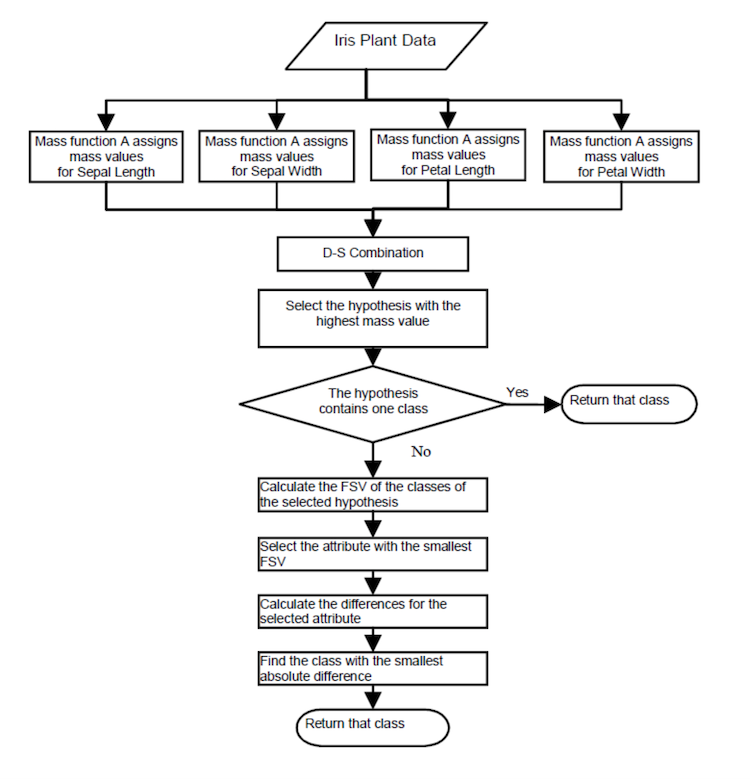

In [ ]:
import functools

def min_fsv_attr(sdf, fields):
    """
    Minimum fav attribute
    """
    fsv = {}
    for f in fields:
        l = list(sdf.loc[:, f]['std'])
        fsv[f] = functools.reduce(lambda a,b: a*b, l) / df[f].std()
    return min(fsv.keys(), key=(lambda k: fsv[k]))

def min_dist_attr(sdf, fsv_attr, candidates, sample):
    dist = {}
    for c in candidates:
        dist[c] = abs(sample[fsv_attr] - sdf.loc[c, fsv_attr]['mean'])
    return min(dist.keys(), key=(lambda k: dist[k]))

sdf = df.groupby('Class').describe()
fsv_attr = min_fsv_attr(sdf, fields) 
print(fsv_attr)

PetalWidth


In [ ]:
def predict(df, combine):
    best = 0.0
    bestClass = frozenset({})
    for c in combine.all():
        if (combine[c] > best):
            best = combine[c]
            bestClass = c
    return (bestClass, best)


countFail = 0
countPredict = 0
ms = {}
for index, row in df.iterrows():
    sample = row
    for f in fields:
        hypothesisCount = dict.fromkeys(powerset(df.Class.unique()), 0)
        h = hypothesis(df, classRange, f, sample[f])
        hypothesisCounts(hypothesisCount, h, singletons, frame)   
        ms[f] = MassFunction(hypothesisCount).normalize()
        
    # which is doing - ms['SepalLength'] & ms['SepalWidth'] & ms['PetalLength'] & ms['PetalWidth']
    combine_mf = functools.reduce(lambda a,b: a & b, ms.values())

    (bestClass, best) = predict(df, combine_mf)
    if (bestClass in singletons) and (best > 0.8):
        
        # if a singleton class and the confidence is greater than 80%
        countPredict += 1
        if bestClass != frozenset({sample.Class}):
            # print('failed predict:', set(bestClass), best, 'expect:', set({sample.Class}))
            countFail +=1
    else:
        # not a singleton class, find by second step strategy
        # print(set(bestClass), best)
        fsvClass = min_dist_attr(sdf, fsv_attr, list(bestClass), sample)
        if (best > 0.8):
            countPredict += 1
            if fsvClass != sample.Class:
                # print('FSV failed predict:', set({fsvClass}), best, 'expect:', set({sample.Class}))
                countFail +=1
    
print('total rows', df.Class.count())
print('total predicted', countPredict)
print('total fail predicted', countFail)
print('accuracy rate', (countPredict - countFail)/(countPredict*1.0))

total rows 150
total predicted 150
total fail predicted 6
accuracy rate 0.96
